In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

import numpy as np
#load .npy file
data = np.load('C:/Users/moham/OneDrive/Desktop/thesis/data/npy/smallPiston.npy')

data.shape

(207, 232, 232)

In [2]:
#import helpers here when cleaning

'importlib.reload' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
np.max(data), np.min(data)

(55682, 0)

In [16]:
watermark= qrToArray('C:/Users/moham/OneDrive/Desktop/thesis/data/qr/qr_code.png')


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage, datasets


# Wavelet to be used
wavelet = 'haar'



def embed_watermark(original_data, watermark, alpha):
    coefficients = pywt.dwtn(original_data, wavelet, mode='symmetric', axes=None)

    # Extract the approximation coefficients from the DWT
    #brings out half
    approx_coeffs = coefficients['aaa']

    watermark_shape= approx_coeffs.shape
    # Resize watermark => the approximation coefficients
    resized_watermark = reshape_watermark(watermark, watermark_shape)  

    scaled_watermark = np.multiply(resized_watermark, alpha)

    # Embed the watermark by adding it to the approximation coefficients
    watermarked_coeffs = approx_coeffs*scaled_watermark

    watermarked_coeffs_dict = dict(coefficients)
    watermarked_coeffs_dict['aaa'] = watermarked_coeffs

    return watermarked_coeffs_dict

# reconstruct data
def reconstruct_watermarked_volume(watermarked_coeffs, wavelet):
    # Perform inverse 3D DWT to reconstruct the watermarked volume
    watermarked_data = pywt.idwtn(watermarked_coeffs, wavelet, mode='symmetric', axes=None)
    return watermarked_data

In [32]:
from scipy.ndimage import zoom 

#alpha value doit être proche à 255 
# parce que wm doit être prsque égale à 1 
alpha_value = 1/257
watermarked_coeffs = embed_watermark(data, watermark, alpha=alpha_value)

watermarked_data_reconstructed = reconstruct_watermarked_volume(watermarked_coeffs, wavelet) 

watermarked_data_reconstructed= np.maximum(watermarked_data_reconstructed, 0)


In [28]:
import numpy as np
import ipyvolume as ipv

toplot= data

toplot = toplot- np.min(toplot)
toplot = toplot/ np.max(toplot)

#dataRoi in case it is needed

# visualize, replace with func when cleaning
ipv.figure()
ipv.quickvolshow(toplot, level=[0.2, 0.8], opacity=0.1, level_width= 0.1, data_min=0, data_max=1)
ipv.view(-30, 40)
ipv.show()

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

In [34]:
import numpy as np
import ipyvolume as ipv

toplot= watermarked_data_reconstructed
toplot = toplot- np.min(toplot)
toplot = toplot/ np.max(toplot)


#dataRoi

ipv.figure()
ipv.quickvolshow(toplot, level=[0.2, 0.8], opacity=0.1, level_width= 0.1, data_min=0, data_max=1)
ipv.view(-30, 40)
ipv.show()

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

In [13]:
watermarked_data_reconstructed

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

In [22]:
toplot= watermarked_data_reconstructed
np.min(toplot)


0.0

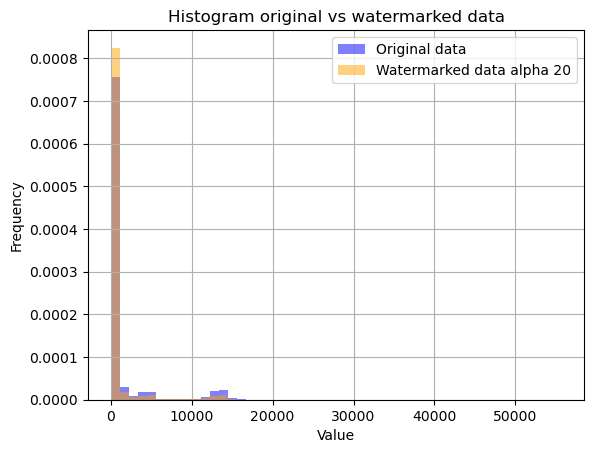

In [21]:
# plot a histogram of values 
flattened_data = data.flatten()
flattened_data2 = watermarked_data_reconstructed.flatten()


# Plot histograms in the same figure
plt.hist(flattened_data, bins=50, density=True, alpha=0.5, color='blue', label='Original data')
plt.hist(flattened_data2, bins=50, density=True, alpha=0.5, color='orange', label='Watermarked data alpha 20') 

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram original vs watermarked data')
plt.legend()
plt.grid(True)
plt.show()




In [19]:
np.max(data), np.max(watermarked_data_reconstructed)


(55682, 55315.89275205966)

In [39]:
coefficients = pywt.dwtn(data, wavelet, mode='symmetric', axes=None)


approx_coeffs = coefficients['aaa']

watermark_shape= approx_coeffs.shape
watermark_shape

(104, 116, 116)

In [40]:
# Resize watermark => the approximation coefficients
resized_watermark = reshape_watermark(watermark, watermark_shape)  
resized_watermark.shape

(104, 116, 116)

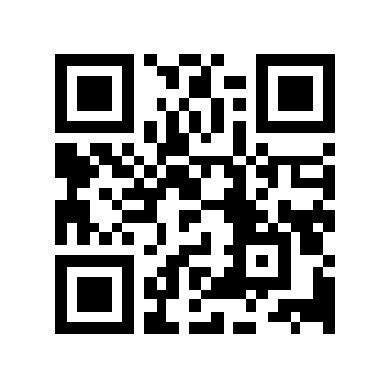

In [24]:
plt.imshow(resized_watermark[50], cmap='gray')
plt.axis('off')
plt.show()


In [41]:
watermarked_coeffs['aaa'].shape

(104, 116, 116)

In [34]:
scaled_watermark = np.multiply(resized_watermark, 1/254)
scaled_watermark

array([[[1.00393701, 1.00393701, 1.00393701, ..., 1.00393701,
         1.00393701, 1.00393701],
        [1.00393701, 1.00393701, 1.00393701, ..., 1.00393701,
         1.00393701, 1.00393701],
        [1.00393701, 1.00393701, 1.00393701, ..., 1.00393701,
         1.00393701, 1.00393701],
        ...,
        [1.00393701, 1.00393701, 1.00393701, ..., 1.00393701,
         1.00393701, 1.00393701],
        [1.00393701, 1.00393701, 1.00393701, ..., 1.00393701,
         1.00393701, 1.00393701],
        [1.00393701, 1.00393701, 1.00393701, ..., 1.00393701,
         1.00393701, 1.00393701]],

       [[1.00393701, 1.00393701, 1.00393701, ..., 1.00393701,
         1.00393701, 1.00393701],
        [1.00393701, 1.00393701, 1.00393701, ..., 1.00393701,
         1.00393701, 1.00393701],
        [1.00393701, 1.00393701, 1.00393701, ..., 1.00393701,
         1.00393701, 1.00393701],
        ...,
        [1.00393701, 1.00393701, 1.00393701, ..., 1.00393701,
         1.00393701, 1.00393701],
        [1.0

In [54]:
watermarked_data_reconstructed[10][12][80]

0.0

In [52]:
data

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[ 83,  25,  62, ..., 121,  48,   0],
        [ 52,  64,  49, ...,  46,   0,  31],
        [ 50,  38,  30, ...,   7,  19,  15